Menyiapkan pustaka (Library) yg diperlukan:
- networkx: Library ini digunakan untuk menganalisis dan memanipulasi grafik atau jaringan.
- seaborn: Ini adalah library untuk membuat visualisasi data yang menarik dan informatif.
- pandas: Pandas adalah library yang sangat berguna untuk manipulasi dan analisis data tabular.
- numpy: NumPy adalah library yang digunakan untuk komputasi numerik.
- matplotlib.pyplot: Library ini digunakan untuk membuat grafik dan visualisasi data.
- matplotlib.patches.Patch: Ini adalah bagian dari Matplotlib yang memungkinkan Kita untuk membuat bentuk dan pola khusus dalam plot.
- sklearn.cluster.KMeans: KMeans adalah algoritma clustering yang digunakan untuk mengelompokkan data ke dalam kelompok-kelompok.
- sklearn.preprocessing.StandardScaler: Digunakan untuk mengubah skala data sehingga memiliki mean nol dan deviasi standar satu.
- sklearn.feature_extraction.text.CountVectorizer: Ini digunakan untuk mengubah teks menjadi representasi numerik.
- scipy.cluster.hierarchy: Ini adalah bagian dari SciPy yang menyediakan alat untuk analisis hierarki data.
- scipy.spatial.distance.pdist: pdist digunakan untuk menghitung jarak antara semua pasangan.
- scipy.spatial.distance.squareform: squareform mengubah hasilnya menjadi matriks jarak.

Penjelasan kode:
- pd.read_csv("./dataset/Social Science A.csv"): 
Ini adalah perintah yang meminta Python untuk membaca isi dari file "Social Science A.csv". File ini harus berada dalam folder "dataset" di direktori kerja saat ini. Pts (pd) akan membantu kita membaca dan memahami data tersebut.
- df:
Ini adalah nama kotak untuk menyimpan data yang telah dibaca. Dengan nama "df," kita bisa dengan mudah mengakses dan memanipulasi data ini di program Python kita.


In [11]:
%%time
import networkx as nx
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import LinearSegmentedColormap
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data set csv
df = pd.read_csv("./new_ds/KUISONER SOSIOMETERI VII A.csv")
# df.set_index('NO ABSEN', inplace=True)
df

CPU times: user 4.7 ms, sys: 1.8 ms, total: 6.5 ms
Wall time: 5.42 ms


,Timestamp,Email Address,NAMA LENGKAP,NO ABSEN,KELAS,1. Teman anda yang paling anda sukai di kelas,Alasan,2. Teman anda yang paling anda sukai di kelas,ALASAN,1. Teman anda yang paling anda tidak sukai di kelas,ALASAN.1,2. Teman anda yang paling anda tidak sukai di kelas,ALASAN.2
0,5/3/2023 19:42:22,cokratu2010@gmail.com,CIRG,1,VIIA,NMMS,Karena paling nyaman di ajak curhat,NMMS,Paling nyaman di ajak curhat,IDKWP,Sering mengganggu saat jam pelajaran,IDKWP,Kadang mengganggu saat jam pelajaran
1,5/3/2023 15:20:48,anugrahwidiantari@gmail.com,IDGSW,2,VIIA,IDKWP,Baik hati,IAGFJGM,Murah senyum,IPRAS,Suka mengejek nama ortu,IGP,Suka mengejek nama ortu
2,5/3/2023 17:41:53,idewaketutwidhisandhyka@gmail.com,IDKWP,3,VIIA,IKTAMP,Karena orangnya bisa diajak bercanda mau di ke...,IGP,Bisa diajak berkomunikasi lebih dekat,NPEM,Karena sering di gosipin,NMCDA,Sering melirik dengan lirikan seperti membenci
3,5/3/2023 17:47:33,madebaskara2020@gmail.com,IDMBP,4,VIIA,IGCW,dia baik sering mebantu saya saat kesusahan da...,IGCW,dia baik sering membatu saya saat kesusahan da...,IKSK,Tidak ada,NKMKL,Tidak ada
4,5/3/2023 19:49:54,pangkywayan@gmail.com,IGCW,5,VIIA,IGP,Karena Pratama adalah teman ngobrol saya yang ...,IDMBP,Karena Dewa Baskara sangat baik dan Dewa Baska...,IKWPP,Karena wahyu tidak bisa diajak bercanda,IKSK,Karena Kadek Suartana selalu mengejek nama ora...
5,5/16/2023 18:56:55,putu09ama@gmail.com,IGP,6,VIIA,IDGSW,Karena dia lucu dan seru kalo di ajk ngobrol t...,IKTAMP,Karena dia teman saya dari kelas tiga SD dan d...,INRBSW,Dia tu jutek dan pilih pilih klo nyari temen t...,IKWPP,Dia orang nya pemarah trus sering mukull kepal...
6,6/7/2023 21:17:56,nikomangsulastriasih@gmail.com,IKAD,7,VIIA,IWY,karena orangnya asik,MAS,karena orangnya lucu,INRBSW,karena suka pilih-pilih teman,IDMBP,karena suka mengadu
7,5/5/2023 10:33:47,ikadekrehandwipermana265@gmail.com,IKRDP,8,VIIA,IKWPP,Karena orangnya baik,IPASK,Karena baik,IKSK,Sering mengejek nama orang tua,IPRAS,Sering mengejek nama orangtua
8,5/3/2023 20:45:09,dekyo47@gmail.com,IKRSA,9,VIIA,MAS,karna bestii anjayy,IWY,karna bestiiii anjayy,NMCDA,karna campah pada guru,IPRAS,karna wibuuuu
9,5/4/2023 18:43:15,kadeksuartana1711@gmail.com,IKSK,10,VIIA,IKTAMP,Orang nya seru kalau di ajak ngobrol,IPASK,Orang nya seru kalau di ajak ngobrol,NPEM,suka nyebut nama bapak saya,IKWPP,Suka marah kalau diajak bercanda


- df['Alasan']:
Ini adalah cara untuk mengakses kolom 'Alasan' dalam DataFrame 'df'. Dengan menggunakan tanda kurung siku dan nama kolom, kita memilih kolom yang ingin kita ubah.
- .fillna('Tidak disebutkan', inplace=True):
Ini adalah metode yang digunakan pada kolom 'Alasan'. Metode fillna digunakan untuk menggantikan nilai-nilai yang hilang (NaN) dalam kolom dengan nilai yang diberikan, dalam hal ini, 'Tidak disebutkan'. Parameter inplace=True digunakan untuk mengubah DataFrame asli (df) tanpa perlu menetapkan ulangnya ke variabel lain.

In [12]:
%%time
# Penanganan data yang hilang

df['Alasan'].fillna('Tidak disebutkan', inplace=True)

CPU times: user 475 µs, sys: 58 µs, total: 533 µs
Wall time: 525 µs


- df:
Ini adalah DataFrame yang ingin Kita simpan ke dalam file CSV. DataFrame ini mungkin telah Kita ubah sebelumnya dengan berbagai operasi data.
- .to_csv('./Processed Data A.csv'): 
Ini adalah metode yang digunakan pada DataFrame 'df'. Metode to_csv digunakan untuk menulis atau menyimpan data dari DataFrame ke dalam sebuah file CSV. Dalam hal ini, file CSV akan disimpan dengan nama "Processed Data A.csv" dan akan tersimpan di direktori yang sama dengan script Python Kita (ditentukan dengan './').
- index=False: 
Parameter ini digunakan untuk mengabaikan penambahan indeks baris saat menyimpan DataFrame ke dalam file CSV. Jika index=True, maka indeks baris akan disimpan sebagai kolom tambahan di dalam file CSV, sedangkan jika index=False, indeks baris akan diabaikan.

In [13]:
%%time
# Menimpan dataframe yang telah diolah

df.to_csv('./new_processing/Processed Data A.csv', index=False)

CPU times: user 2.51 ms, sys: 2.43 ms, total: 4.94 ms
Wall time: 4.4 ms


- n = len(df['NAMA LENGKAP'].unique()):
Dalam langkah ini, kita menghitung jumlah nilai unik dalam kolom 'NAMA LENGKAP' dari DataFrame 'df' dan menyimpannya dalam variabel 'n'. Ini akan digunakan untuk menentukan ukuran matriks nanti.
- sosiometri_matrix = np.zeros((n, n)): 
Di sini, kita menggunakan NumPy (dengan np) untuk membuat matriks nol (semua elemen matriks bernilai nol) dengan ukuran n x n. Matriks ini akan digunakan untuk menyimpan data sosiometri atau data yang menggambarkan hubungan antar elemen-elemen dalam kumpulan data.

In [14]:
%%time
# Inisialisasi matriks

n = len(df['NAMA LENGKAP'].unique())
sosiometri_matrix = np.zeros((n, n))

CPU times: user 236 µs, sys: 32 µs, total: 268 µs
Wall time: 255 µs


- {name: idx for idx, name in enumerate(df['NAMA LENGKAP'].unique())}:
Ini adalah sebuah ekspresi kamus (dictionary comprehension) yang digunakan untuk membuat kamus baru. Kamus ini akan memiliki pasangan kunci (nama) dan nilai (indeks) yang akan digunakan untuk menghubungkan nama dengan posisi indeks dalam suatu struktur data.
- enumerate(df['NAMA LENGKAP'].unique()):
Dalam ekspresi ini, kita menggunakan fungsi enumerate untuk mengambil nilai-nilai unik dalam kolom 'NAMA LENGKAP' dari DataFrame 'df'. Fungsi enumerate mengembalikan indeks (idx) dan nilai (name) dari setiap elemen dalam data tersebut.
Akhirnya, kita memetakan setiap nama ke indeks yang sesuai dalam kamus. Ini akan membantu kita melacak nama-nama tersebut berdasarkan indeksnya.

In [15]:
%%time
# Membuat mapping nama ke indeks

name_to_index = {name: idx for idx, name in enumerate(df['NAMA LENGKAP'].unique())}

CPU times: user 149 µs, sys: 20 µs, total: 169 µs
Wall time: 157 µs


Kode ini melakukan perulangan melalui setiap baris dalam DataFrame 'df' menggunakan df.iterrows(). Untuk setiap baris, ia mengumpulkan nama-nama teman yang disukai dan tidak disukai dalam variabel 'liked_names' dan 'disliked_names'.

Kemudian, ia memeriksa apakah nama-nama tersebut ada dalam kamus 'name_to_index'. Jika ada, ia mengakses matriks sosiometri ('sosiometri_matrix') dan meningkatkan nilai (untuk teman yang disukai) atau mengurangkan nilai (untuk teman yang tidak disukai) pada posisi yang sesuai dalam matriks.

Hasil akhirnya adalah matriks sosiometri yang mencerminkan hubungan antara individu-individu dalam kelas berdasarkan preferensi mereka terhadap teman-teman tertentu. Nilai positif mungkin menunjukkan tingkat keterkaitan atau kesukaan, sedangkan nilai negatif mungkin menunjukkan ketidaksukaan.

In [16]:
%%time
# Isi matriks berdasarkan data

for idx, row in df.iterrows():
    # Untuk teman yang disukai
    liked_names = [row['1. Teman anda yang paling anda sukai di kelas'],
                   row['2. Teman anda yang paling anda sukai di kelas']]

    for liked_name in liked_names:
        if liked_name in name_to_index:
            sosiometri_matrix[name_to_index[row['NAMA LENGKAP']]][name_to_index[liked_name]] += 1

    # Untuk teman yang tidak disukai
    disliked_names = [row['1. Teman anda yang paling anda tidak sukai di kelas'],
                      row['2. Teman anda yang paling anda tidak sukai di kelas']]

    for disliked_name in disliked_names:
        if disliked_name in name_to_index:
            sosiometri_matrix[name_to_index[row['NAMA LENGKAP']]][name_to_index[disliked_name]] -= 1


CPU times: user 4.39 ms, sys: 29 µs, total: 4.42 ms
Wall time: 4.42 ms


- plt.figure(figsize=(10, 8)): 
Ini adalah perintah untuk membuat gambar (figure) yang akan digunakan sebagai tempat untuk plot heatmap. Dalam contoh ini, gambar akan memiliki ukuran 10x8 inci.
- sns.heatmap(sosiometri_matrix, cmap='RdBu_r'): 
Ini adalah perintah untuk membuat heatmap menggunakan library Seaborn (sns). Kita memberikan matriks sosiometri ('sosiometri_matrix') sebagai data yang akan diplot. Parameter cmap='RdBu_r' digunakan untuk memilih skema warna yang akan digunakan dalam heatmap. Skema warna 'RdBu_r' menggambarkan nilai positif dengan warna biru dan nilai negatif dengan warna merah.
- plt.show(): 
Ini adalah perintah untuk menampilkan gambar dengan heatmap yang telah dibuat. Jadi, hasil dari semua langkah sebelumnya akan ditampilkan dalam jendela atau output visual.

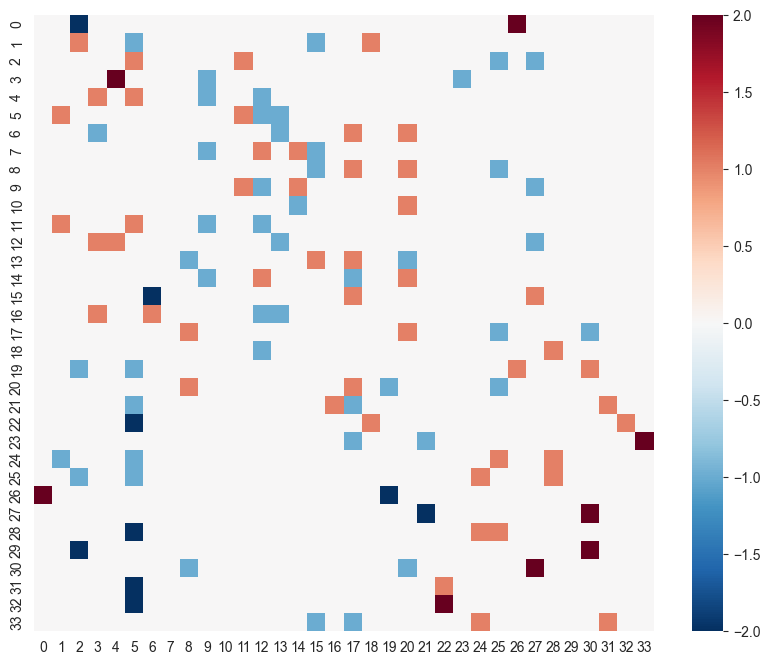

CPU times: user 1.03 s, sys: 134 ms, total: 1.17 s
Wall time: 805 ms


In [17]:
%%time
# Visualisasi matriks

plt.figure(figsize=(10, 8))
sns.heatmap(sosiometri_matrix, cmap='RdBu_r')
plt.show()


- scaler = StandardScaler():
Kita membuat objek scaler yang merupakan instance dari StandardScaler. StandardScaler adalah salah satu teknik penskalaan yang umum digunakan dalam analisis data. Ini akan mengubah setiap kolom dari matriks sosiometri sehingga memiliki rata-rata nol (mean) dan deviasi standar satu (standard deviation).
- sosiometri_scaled = scaler.fit_transform(sosiometri_matrix): 
Kita menggunakan scaler yang telah Kita buat untuk melakukan penskalaan pada matriks sosiometri ('sosiometri_matrix'). Hasilnya akan disimpan dalam sosiometri_scaled. Dengan melakukan penskalaan, Kita mengubah data sehingga memiliki skala yang seragam, yang dapat berguna dalam beberapa analisis statistik dan pemodelan.


In [18]:
%%time
# Standarisasi data

scaler = StandardScaler()
sosiometri_scaled = scaler.fit_transform(sosiometri_matrix)

CPU times: user 1.32 ms, sys: 432 µs, total: 1.75 ms
Wall time: 1.48 ms


- wcss = []: 
Ini adalah sebuah list yang akan digunakan untuk menyimpan nilai WCSS (Within-Cluster Sum of Squares) untuk setiap jumlah kluster yang diuji.
- Loop for i in range(1, 11):
Ini adalah loop yang akan mencoba jumlah kluster dari 1 hingga 10. Kita akan melihat bagaimana nilai WCSS berubah seiring dengan peningkatan jumlah kluster.
- Di dalam loop, kita membuat sebuah model K-Means dengan KMeans(n_clusters=i, init='k-means++', random_state=42). n_clusters=i mengatur jumlah kluster sesuai dengan iterasi saat ini. init='k-means++' adalah cara yang lebih baik untuk menginisialisasi pusat kluster, dan random_state=42 digunakan untuk hasil yang dapat direproduksi.
- Selanjutnya, kita melatih model K-Means pada data yang telah diubah skala sosiometri_scaled.
Nilai WCSS (Within-Cluster Sum of Squares) untuk model saat ini dihitung dengan kmeans.inertia_ dan dimasukkan ke dalam list wcss.
Setelah loop selesai, kita membuat plot dengan matplotlib. Plot ini akan menunjukkan bagaimana nilai WCSS berubah seiring dengan peningkatan jumlah kluster.
- Pada akhirnya, kita menampilkan plot yang menunjukkan "Metode Siku (Elbow Method)" untuk membantu kita memilih jumlah kluster yang optimal. Biasanya, kita mencari lokasi di mana grafik menunjukkan "elbow" atau siku, yang dapat menjadi pilihan yang baik untuk jumlah kluster yang optimal.

/Users/devpyhton/Library/Caches/pypoetry/virtualenvs/sociometryclustering--gzAnhi_-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/devpyhton/Library/Caches/pypoetry/virtualenvs/sociometryclustering--gzAnhi_-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/devpyhton/Library/Caches/pypoetry/virtualenvs/sociometryclustering--gzAnhi_-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  

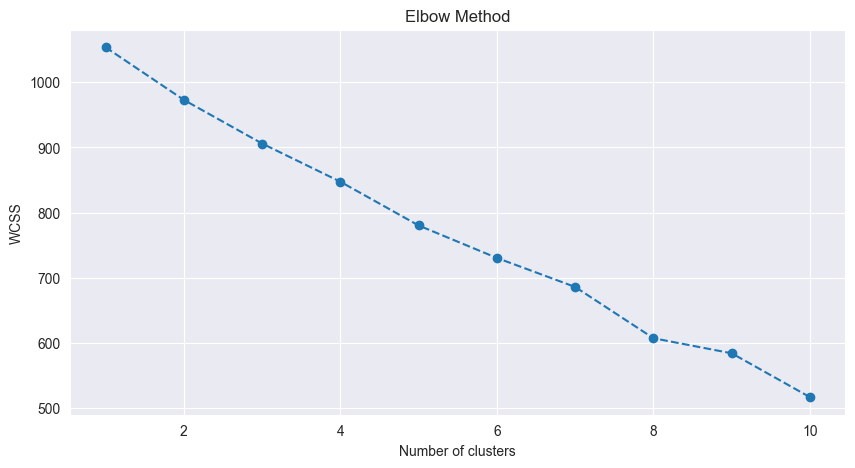

CPU times: user 1.7 s, sys: 714 ms, total: 2.42 s
Wall time: 562 ms


In [19]:
%%time
# Menentukan jumlah klaster menggunakan metode Elbow

wcss = [] # within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(sosiometri_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- optimal_clusters = 2: 
Di sini, kita menetapkan jumlah kluster yang telah kita pilih sebagai 2, berdasarkan hasil analisis elbow yang telah kita lakukan sebelumnya. Kita dapat mengganti nilai ini sesuai dengan jumlah kluster yang Kita anggap optimal.
- kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42): 
Kode ini digunakan untuk membuat model K-Means dengan jumlah kluster yang telah kita pilih sebagai optimal_clusters. Parameter init='k-means++' digunakan untuk menginisialisasi pusat kluster dengan cara yang lebih baik, dan random_state=42 digunakan untuk hasil yang dapat direproduksi.
- Selanjutnya, kita menggunakan kmeans.fit_predict(sosiometri_scaled) untuk menghitung kluster (kelompok) yang sesuai untuk setiap data dalam sosiometri_scaled. Hasilnya adalah clustered_students, yang akan berisi indeks kluster (0 atau 1 dalam kasus ini) untuk setiap data atau siswa.

In [20]:
%%time
# Menerapkan K-Means Clustering

optimal_clusters = 2  # misalkan kita memilih 2 berdasarkan metode elbow

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clustered_students = kmeans.fit_predict(sosiometri_scaled)


CPU times: user 38.2 ms, sys: 3.21 ms, total: 41.4 ms
Wall time: 12.9 ms


/Users/devpyhton/Library/Caches/pypoetry/virtualenvs/sociometryclustering--gzAnhi_-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


- `df['Cluster'] = clustered_students` digunakan untuk menambahkan kolom baru bernama 'Cluster' ke dalam DataFrame 'df' dan mengisinya dengan hasil clustering yang telah dilakukan sebelumnya. 

- Pada tahap ini, kolom 'Cluster' akan berisi angka yang menunjukkan kluster (kelompok) mana setiap data siswa termasuk. Ini akan memungkinkan kita untuk dengan mudah mengidentifikasi dan membedakan siswa-siswa dalam masing-masing kluster ketika kita melakukan analisis lanjutan atau visualisasi data.

In [21]:
%%time
# Menambahkan hasil kluster ke dataframe awal

df['Cluster'] = clustered_students

CPU times: user 5.36 ms, sys: 534 µs, total: 5.9 ms
Wall time: 1.65 ms


- G: 
Ini adalah nama variabel yang digunakan untuk menyimpan objek graf berarah yang baru dibuat.
- nx.DiGraph():
Ini adalah konstruktor yang digunakan untuk membuat graf berarah. Dalam hal ini, kami menggunakan DiGraph() dari library NetworkX (nx) untuk membuat graf yang memiliki arah pada setiap sambungannya. Graf berarah adalah graf di mana setiap sambungan memiliki arah atau panah yang menghubungkan dua simpul (node) dan dapat digunakan untuk menggambarkan hubungan yang memiliki arah, seperti relasi antara dua entitas dalam jaringan.

In [22]:
%%time
# Inisiasi graf berarah

G = nx.DiGraph()

CPU times: user 31 µs, sys: 32 µs, total: 63 µs
Wall time: 64.8 µs


- for idx, row in df.iterrows(): 
Ini adalah loop yang akan mengiterasi melalui setiap baris (data siswa) dalam DataFrame 'df'. Loop ini akan membantu kita menambahkan simpul untuk setiap siswa ke dalam graf 'G'.
- G.add_node(row['NAMA LENGKAP'], cluster=row['Cluster']): 
- Dalam setiap iterasi, kita menggunakan G.add_node(...) untuk menambahkan simpul ke dalam graf. row['NAMA LENGKAP'] digunakan sebagai nama simpul, yang diambil dari kolom 'NAMA LENGKAP' dalam DataFrame. row['Cluster'] digunakan sebagai atribut simpul yang disebut 'cluster', yang akan menyimpan informasi tentang kluster ke mana siswa tersebut termasuk.

In [23]:
%%time
# eTambahkan node ke graf

for idx, row in df.iterrows():
    G.add_node(row['NAMA LENGKAP'], cluster=row['Cluster'])


CPU times: user 2.33 ms, sys: 147 µs, total: 2.48 ms
Wall time: 2.47 ms


- for idx, row in df.iterrows(): 
Ini adalah loop yang mengiterasi melalui setiap baris (data siswa) dalam DataFrame 'df'. Loop ini digunakan untuk menambahkan sambungan (edges) ke dalam graf 'G' berdasarkan preferensi teman dalam data siswa.
- Untuk setiap siswa, kita memeriksa teman yang disukai (liked friends) dan teman yang tidak disukai (disliked friends) dalam DataFrame.
- Dalam setiap iterasi, kita menggunakan if untuk memeriksa apakah teman yang disebutkan dalam kolom '1. Teman anda yang paling anda sukai di kelas' atau '2. Teman anda yang paling anda tidak sukai di kelas' termasuk dalam simpul-simpul yang sudah ada dalam graf 'G'. Jika termasuk, kita menambahkan sambungan (edge) antara siswa (simpul 'NAMA LENGKAP') dengan teman tersebut. Bobot sambungan ditentukan sebagai 1 untuk teman yang disukai dan -1 untuk teman yang tidak disukai.

In [24]:
%%time
# Tambahkan edge(hubungan) ke graf

for idx, row in df.iterrows():
    # Teman yang disukai
    if row['1. Teman anda yang paling anda sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['1. Teman anda yang paling anda sukai di kelas'], weight=1)

    if row['2. Teman anda yang paling anda sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['2. Teman anda yang paling anda sukai di kelas'], weight=1)

degree_dict = dict(G.degree())
nx.set_node_attributes(G, degree_dict, 'count')


CPU times: user 3.86 ms, sys: 138 µs, total: 4 ms
Wall time: 4.04 ms


- fig, ax = plt.subplots(figsize=(15, 15)):
Ini adalah langkah pertama dalam menggambar graf. Kita membuat objek gambar dan objek sumbu (axis) dengan ukuran figur (figure) yang telah ditentukan.
- colors = [node[1]['cluster'] for node in G.nodes(data=True)]:
Kita membuat daftar warna (colors) berdasarkan atribut 'cluster' dari setiap simpul (node) dalam graf 'G'. Ini berarti Kita akan memberikan warna yang berbeda kepada setiap simpul sesuai dengan kluster (cluster) ke mana mereka termasuk.
- pos = nx.spring_layout(G):
Kita menentukan tata letak (layout) dari simpul-simpul dalam graf. Dalam kasus ini, Kita menggunakan tata letak spring_layout dari NetworkX, yang akan menempatkan simpul-simpul secara terpisah dalam sebuah tata letak yang terlihat lebih baik. Kita bisa mencoba tata letak lainnya seperti shell_layout, circular_layout, dan lain-lain.
- nx.draw(G, pos, ax=ax, with_labels=True, node_color=colors, cmap=plt.cm.RdBu, font_size=10, node_size=1000):
Kita menggunakan nx.draw() untuk menggambar graf berdasarkan tata letak yang telah ditentukan sebelumnya. Parameter yang digunakan antara lain:
  - G: Graf yang akan digambar.
  - pos: Tata letak simpul.
  - ax: Sumbu (axis) tempat graf akan digambar.
  - with_labels=True: Menampilkan label pada simpul.
  - node_color=colors: Memberikan warna kepada simpul sesuai dengan kluster.
  - cmap=plt.cm.RdBu: Skema warna yang digunakan (dalam hal ini, RdBu yang telah ditentukan).
  - font_size=10: Ukuran font untuk label simpul.
  - node_size=1000: Ukuran simpul.
- ax.set_title('Graf Berarah Sosiometri'):
Memberikan judul (title) pada graf yang telah digambar.
- plt.show():
untuk menampilkan graf berarah sosiometri ke dalam jendela grafis. Hasilnya adalah visualisasi graf berarah yang mencerminkan hubungan antara siswa dalam kluster berdasarkan preferensi teman-teman mereka.

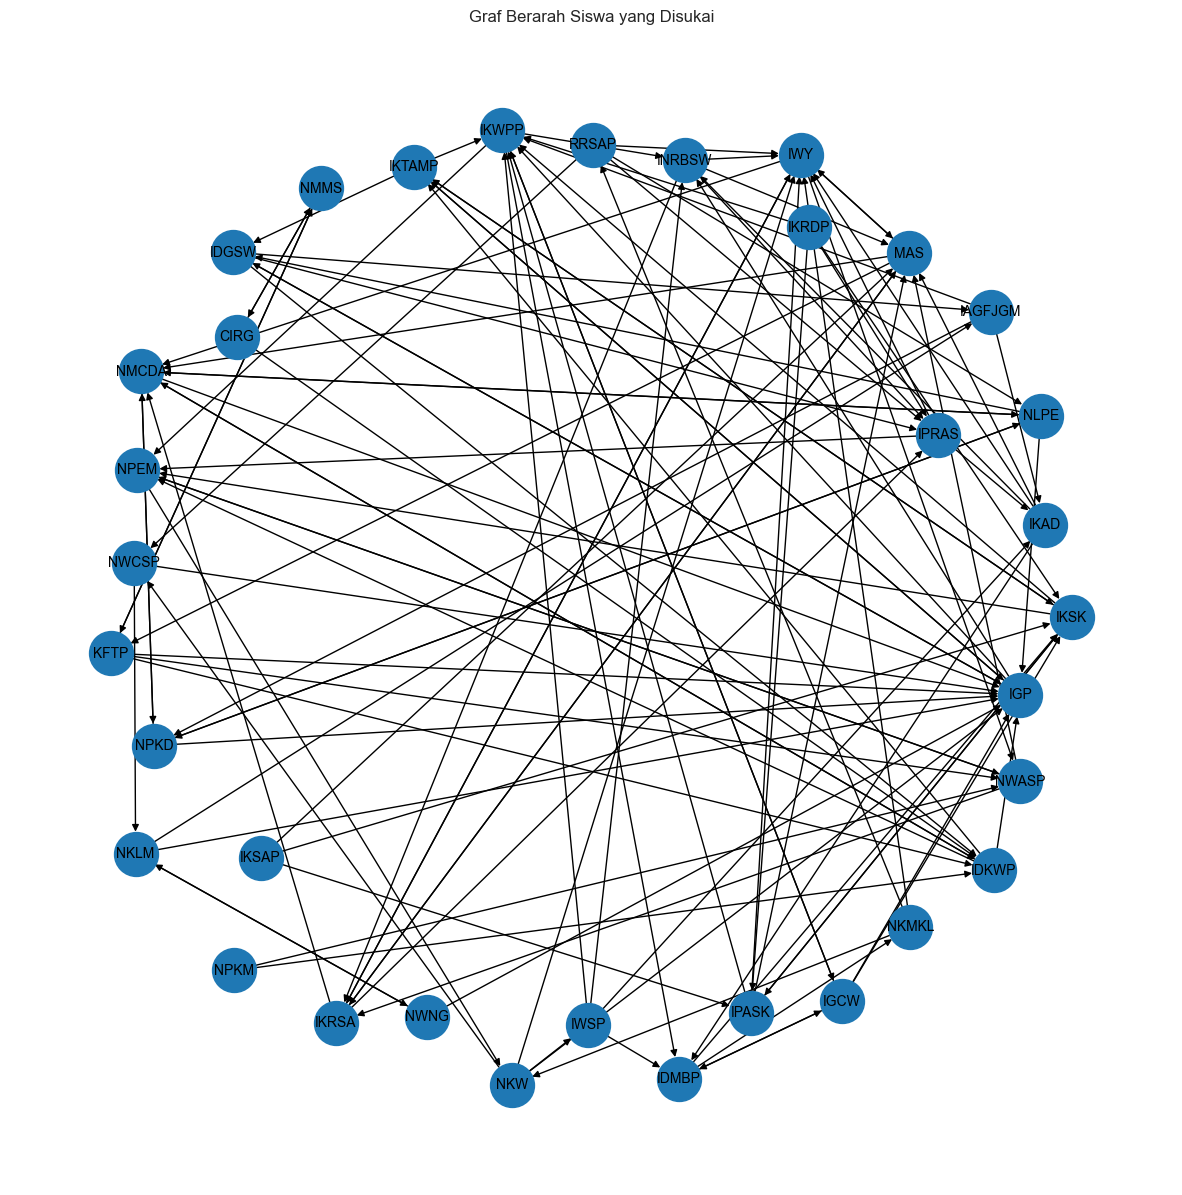

CPU times: user 1.54 s, sys: 250 ms, total: 1.79 s
Wall time: 1.33 s


In [53]:
%%time

# Jarak antara node
k = 50
fig, ax = plt.subplots(figsize=(15, 15))

# Menentukan warna node yang terhubung
connected_colors = {node: data['cluster'] for node, data in G.nodes(data=True)}

# Menentukan warna node yang tidak terhubung
isolated_nodes = list(nx.isolates(G))
isolated_colors = {node: 'gray' for node in G.nodes() if node in isolated_nodes}

# Menggabungkan warna node yang terhubung dan tidak terhubung
colors = [connected_colors.get(node, isolated_colors.get(node, 'gray')) for node in G.nodes]
pos = nx.spring_layout(G, k)

# Visualisasi graf
nx.draw(G, pos, ax=ax, with_labels=True, node_color=colors, cmap=plt.cm.autumn, font_size=10, node_size=1000)

# Mengambil data count dari atribut node
labels = {node: G.nodes[node].get('count', 0) + 4 for node in G.nodes}

# Menambahkan 4 ke setiap nilai di dalam kamus labels
# nx.draw_networkx_labels(G, pos, labels=labels, font_color='black', verticalalignment='bottom', horizontalalignment="left", font_size=20)

ax.set_title('Graf Berarah Siswa yang Disukai')
plt.show()

In [26]:
%%time
# Tambahkan edge(hubungan) ke graf

for idx, row in df.iterrows():
    # Teman yang tidak disukai
    if row['1. Teman anda yang paling anda tidak sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['1. Teman anda yang paling anda tidak sukai di kelas'], weight=-1)

    if row['2. Teman anda yang paling anda tidak sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['2. Teman anda yang paling anda tidak sukai di kelas'], weight=-1)


degree_dict = dict(G.degree())
nx.set_node_attributes(G, degree_dict, 'count')


CPU times: user 3.95 ms, sys: 51 µs, total: 4 ms
Wall time: 3.98 ms


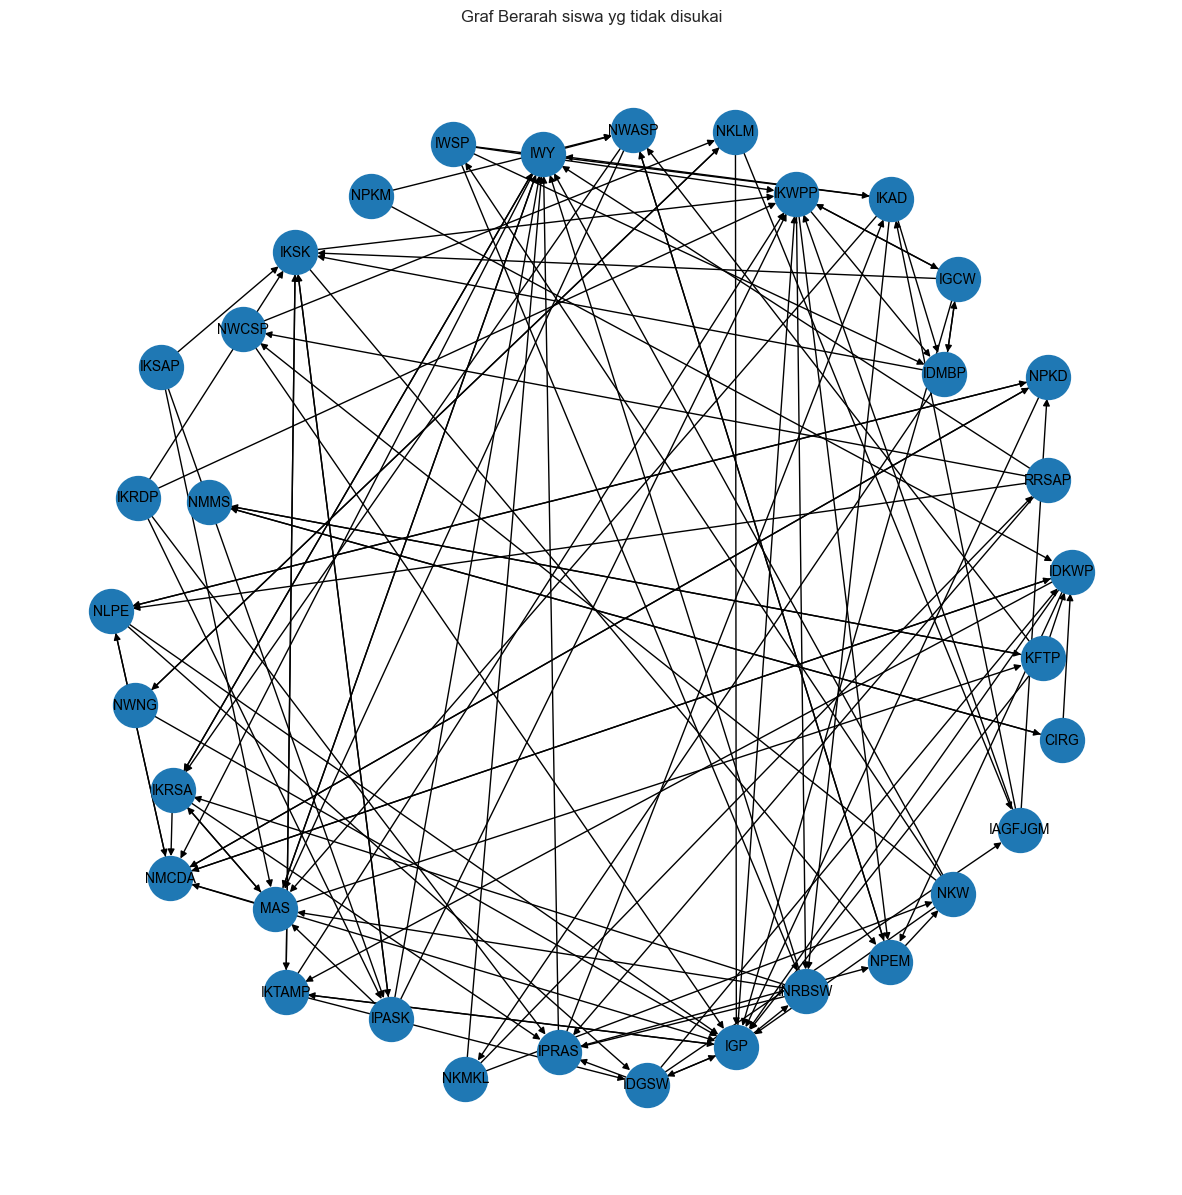

CPU times: user 1.55 s, sys: 267 ms, total: 1.82 s
Wall time: 1.43 s


In [52]:
%%time

# Jarak antara node
k = 50

# Buat figure dan axis
fig, ax = plt.subplots(figsize=(15, 15))

# Pilih warna berdasarkan kluster
colors = [node[1]['cluster'] for node in G.nodes(data=True)]

# Gambar graf pada axis yang diberikan
pos = nx.spring_layout(G, k)  # Kita bisa mencoba layout lain seperti: shell_layout, circular_layout, etc.
nx.draw(G, pos, ax=ax, with_labels=True, font_size=10, node_size=1000)
labels = {node: G.nodes[node].get('count', 0) + 4 for node in G.nodes}
# nx.draw_networkx_labels(G, pos, labels=labels, font_color='black', verticalalignment='bottom', horizontalalignment="left", font_size=20)

ax.set_title('Graf Berarah siswa yg tidak disukai')
plt.show()

In [30]:
%%time
# Tambahkan edge(hubungan) ke graf

for idx, row in df.iterrows():
    # Teman yang disukai
    if row['1. Teman anda yang paling anda sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['1. Teman anda yang paling anda sukai di kelas'], weight=1)

    if row['2. Teman anda yang paling anda sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['2. Teman anda yang paling anda sukai di kelas'], weight=1)

    # Teman yang tidak disukai
    if row['1. Teman anda yang paling anda tidak sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['1. Teman anda yang paling anda tidak sukai di kelas'], weight=-1)

    if row['2. Teman anda yang paling anda tidak sukai di kelas'] in G.nodes:
        G.add_edge(row['NAMA LENGKAP'], row['2. Teman anda yang paling anda tidak sukai di kelas'], weight=-1)


CPU times: user 3.46 ms, sys: 35 µs, total: 3.49 ms
Wall time: 3.53 ms


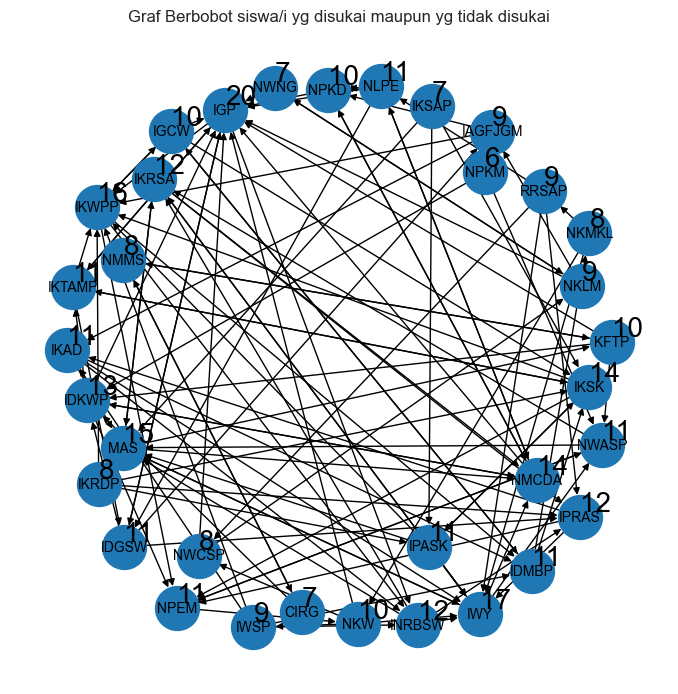

CPU times: user 1.75 s, sys: 554 ms, total: 2.31 s
Wall time: 3.05 s


In [59]:
%%time
# Visualisasi graf berbobot

# Jarak antara node
k = 50

# Buat figure dan axis
fig, ax = plt.subplots(figsize=(8.5, 8.5))

# Pilih warna berdasarkan kluster
colors = [node[1]['cluster'] for node in G.nodes(data=True)]

# Gambar graf pada axis yang diberikan
pos = nx.spring_layout(G, k)  # Kita bisa mencoba layout lain seperti: shell_layout, circular_layout, etc.
nx.draw(G, pos, ax=ax, with_labels=True, font_size=10, node_size=1000)
labels = {node: G.nodes[node].get('count', 0) + 4 for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels=labels, font_color='black', verticalalignment='bottom', horizontalalignment="left", font_size=20)

ax.set_title('Graf Berbobot siswa/i yg disukai maupun yg tidak disukai')
plt.show()

- in_degrees = dict(G.in_degree(weight='weight')):
in_degrees adalah variabel yang akan berisi derajat masuk dari setiap simpul dalam graf 'G'. Derajat masuk adalah jumlah dari bobot (weight) semua sambungan yang menuju ke simpul tersebut. Dalam kasus ini, Kita menggunakan G.in_degree(weight='weight') untuk menghitung derajat masuk dengan memperhatikan bobot sambungan.
- out_degrees = dict(G.out_degree(weight='weight')):
out_degrees adalah variabel yang akan berisi derajat keluar dari setiap simpul dalam graf 'G'. Derajat keluar adalah jumlah dari bobot (weight) semua sambungan yang keluar dari simpul tersebut. Dalam kasus ini, Kita menggunakan G.out_degree(weight='weight') untuk menghitung derajat keluar dengan memperhatikan bobot sambungan.

In [62]:
%%time
# Menghitung bobot untuk setiap Node

in_degrees = dict(G.in_degree(weight='weight'))
out_degrees = dict(G.out_degree(weight='weight'))


CPU times: user 1.28 ms, sys: 4.99 ms, total: 6.28 ms
Wall time: 6.42 ms


- df['in_degree'] = df['NAMA LENGKAP'].map(in_degrees):
ini adalah langkah pertama dalam menambahkan kolom baru. Kita menggunakan map untuk memetakan nilai derajat masuk (in_degree) dari setiap simpul (siswa) ke kolom 'in_degree' dalam DataFrame 'df' berdasarkan nama lengkap ('NAMA LENGKAP') siswa.
- df['out_degree'] = df['NAMA LENGKAP'].map(out_degrees):
ini adalah langkah kedua dalam menambahkan kolom baru. Kita menggunakan map untuk memetakan nilai derajat keluar (out_degree) dari setiap simpul (siswa) ke kolom 'out_degree' dalam DataFrame 'df' berdasarkan nama lengkap ('NAMA LENGKAP') siswa.
- df['total_degree'] = df['in_degree'] + df['out_degree']:
ini adalah langkah ketiga dalam menambahkan kolom baru. Kita membuat kolom 'total_degree' dengan menghitung jumlah derajat masuk dan keluar untuk setiap siswa. Ini akan memberikan total derajat (total_degree) dari setiap siswa, yang mencerminkan sejauh mana siswa tersebut terlibat dalam interaksi dengan teman-teman mereka dalam graf berarah 'G'.

In [63]:
%%time
# Menambahkan bobot ke dataframe

df['in_degree'] = df['NAMA LENGKAP'].map(in_degrees)
df['out_degree'] = df['NAMA LENGKAP'].map(out_degrees)
df['total_degree'] = df['in_degree'] + df['out_degree']


KeyError: 'NAMA LENGKAP'

- most_mentioned = df.sort_values(by='total_degree', ascending=False).head():
Di sini, Kita menggunakan df.sort_values(by='total_degree', ascending=False) untuk mengurutkan DataFrame 'df' berdasarkan kolom 'total_degree' secara menurun (descending order), yang berarti siswa dengan total derajat tertinggi akan muncul di bagian atas.
Kemudian, Kita menggunakan .head() untuk mengambil lima (default) baris pertama dari DataFrame yang telah diurutkan. Ini akan memberikan lima siswa dengan total derajat tertinggi.
- print("Siswa yang Paling Sering Disebutkan:") print(most_mentioned):
Kita mencetak lima siswa yang paling sering disebutkan bersama dengan judul "Siswa yang Paling Sering Disebutkan".
- least_mentioned = df.sort_values(by='total_degree').head():
Di sini, Kita menggunakan df.sort_values(by='total_degree') untuk mengurutkan DataFrame 'df' berdasarkan kolom 'total_degree' secara default (ascending order), yang berarti siswa dengan total derajat terendah akan muncul di bagian atas.
Kemudian, Kita menggunakan .head() untuk mengambil lima (default) baris pertama dari DataFrame yang telah diurutkan. Ini akan memberikan lima siswa dengan total derajat terendah.
- print("\nSiswa yang Paling Jarang Disebutkan:") print(least_mentioned):
Kita mencetak lima siswa yang paling jarang disebutkan bersama dengan judul "Siswa yang Paling Jarang Disebutkan".

In [42]:
%%time
# Analisis bobot

most_mentioned = df.sort_values(by='total_degree', ascending=False).head()
least_mentioned = df.sort_values(by='total_degree').head()

CPU times: user 3.25 ms, sys: 6.53 ms, total: 9.78 ms
Wall time: 19.6 ms


Fungsi welch_powell(graph) adalah implementasi algoritma pewarnaan graf Welch-Powell. Ini adalah algoritma untuk pewarnaan simpul dalam sebuah graf sehingga setiap simpul yang berbagi sambungan (edge) tidak memiliki warna yang sama. Berikut adalah penjelasan tentang bagaimana fungsi ini bekerja:

- color_map = {}: 
Ini adalah kamus yang akan digunakan untuk memetakan setiap simpul ke warna yang diberikan.
- colors = []:
Ini adalah daftar yang akan digunakan untuk menyimpan daftar warna yang digunakan.
- nodes_sorted_by_degree:
Ini adalah daftar simpul dalam graf yang diurutkan berdasarkan derajatnya (jumlah sambungan yang dimiliki oleh setiap simpul), dengan urutan dari yang tertinggi ke yang terendah.
Selanjutnya, dalam loop for node in nodes_sorted_by_degree:, fungsi melakukan langkah-langkah berikut untuk setiap simpul:
  - Membuat available_colors yang merupakan daftar dengan panjang yang sama dengan jumlah simpul dalam graf, diinisialisasi dengan nilai True untuk semua elemennya. Daftar ini akan digunakan untuk melacak warna-warna yang tersedia untuk simpul tersebut.
  - Memeriksa setiap tetangga (neighbor) dari simpul saat ini dan memeriksa jika tetangga tersebut sudah diberi warna (neighbor in color_map). Jika sudah diberi warna, maka warna tersebut menjadi tidak tersedia dalam daftar available_colors, sehingga diindeks dalam daftar tersebut menjadi False.
  - Kemudian, dalam loop for color, available in enumerate(available_colors):, fungsi mencari warna yang tersedia pertama yang memiliki nilai True dalam daftar available_colors. Ini berarti simpul saat ini akan diberi warna yang pertama kali tersedia.
  - Fungsi kemudian memetakan simpul ke warna yang ditemukan, yaitu color_map[node] = color.
  - Jika warna tersebut belum ada dalam daftar colors, maka warna tersebut ditambahkan ke daftar colors.
- fungsi mengembalikan color_map:
yang berisi pemetaan warna untuk setiap simpul, serta jumlah warna yang digunakan dalam pewarnaan graf.

In [43]:
%%time
# Implimentasi Algoritma Welch-Powell

def welch_powell(graph):
    color_map = {}
    colors = []

    # Urutkan simpul berdasarkan derajatnya
    nodes_sorted_by_degree = sorted(list(graph.nodes()), key=lambda x: len(list(graph.neighbors(x))), reverse=True)

    for node in nodes_sorted_by_degree:
        available_colors = [True] * len(graph)

        for neighbor in graph.neighbors(node):
            if neighbor in color_map:
                color = color_map[neighbor]
                available_colors[color] = False

        for color, available in enumerate(available_colors):
            if available:
                color_map[node] = color
                if color not in colors:
                    colors.append(color)
                break

    return color_map, len(colors)

degree_dict = dict(G.degree())
nx.set_node_attributes(G, degree_dict, 'count')

CPU times: user 187 µs, sys: 690 µs, total: 877 µs
Wall time: 1.74 ms


- color_map, num_colors = welch_powell(G):
Kita memanggil fungsi welch_powell(G) untuk melakukan pewarnaan simpul dalam graf 'G'. Hasil dari pemanggilan ini adalah dua nilai yang disimpan dalam variabel color_map dan num_colors.
  - color_map: 
    Ini adalah kamus yang memetakan setiap simpul ke warna yang telah diberikan.
  - num_colors: 
    Ini adalah jumlah warna yang digunakan dalam pewarnaan graf.
- colors = [color_map[node] for node in G.nodes()]:
Kita membuat daftar colors dengan memetakan setiap simpul dalam graf 'G' ke warna yang sesuai dari kamus color_map. Dengan ini, Kita memiliki daftar warna yang sesuai dengan setiap simpul dalam graf, yang dapat digunakan untuk tujuan visualisasi atau analisis lebih lanjut.

In [44]:
%%time
# Menerapkan pewarnaan pada graf

color_map, num_colors = welch_powell(G)
colors = [color_map[node] for node in G.nodes()]


CPU times: user 166 µs, sys: 130 µs, total: 296 µs
Wall time: 301 µs


    - cmap = plt.cm.rainbow: Membuat peta warna (colormap) menggunakan skema warna pelangi (rainbow).

    - norm = plt.Normalize(0, num_colors-1): Membuat normalisasi warna. plt.Normalize digunakan untuk mengonversi nilai-nilai warna ke rentang yang sesuai dengan peta warna yang telah ditentukan. Rentang yang digunakan di sini adalah 0 hingga num_colors-1.

    - normalized_colors = [cmap(norm(color)) for color in colors]: Menghasilkan daftar warna yang telah dinormalisasi berdasarkan peta warna dan normalisasi yang telah dibuat sebelumnya.

    - fig, ax = plt.subplots(figsize=(15, 15)): Menciptakan objek gambar (figure) dan sumbu (axis) untuk menampilkan graf.

    - nx.draw(G, pos, with_labels=True, node_color=colors, cmap=cmap, font_size=10.5, ax=ax): Menggambar graf dengan warna node yang telah dihitung sebelumnya.

    - ax.set_title('Graph Coloring dengan Algoritma Welch-Powell'): Menetapkan judul untuk sumbu (ax).

    - custom_labels = ["Disukai A", "Disukai B", "Tidak A", "Tidak B"]: Membuat label kustom untuk digunakan dalam legenda.

    - legend_labels = {color: f'Cluster {color+1}' for color in set(colors)}: Membuat kamus yang memetakan warna ke label cluster.

    - unique_colors = list(set(colors)): Mendapatkan warna-warna unik yang digunakan dalam graf.

    - handles = [Patch(color=cmap(norm(color)), label=custom_labels[color]) for color in unique_colors]: Membuat objek Patch untuk setiap warna unik dengan label sesuai label kustom.

    - ax.legend(handles=handles, title='Clusters'): Menambahkan legenda ke sumbu (ax) dengan menggunakan objek Patch yang telah dibuat sebelumnya. Judul legenda disetel sebagai 'Clusters'.

    - plt.show(): Menampilkan graf bersama dengan legenda yang telah ditambahkan.

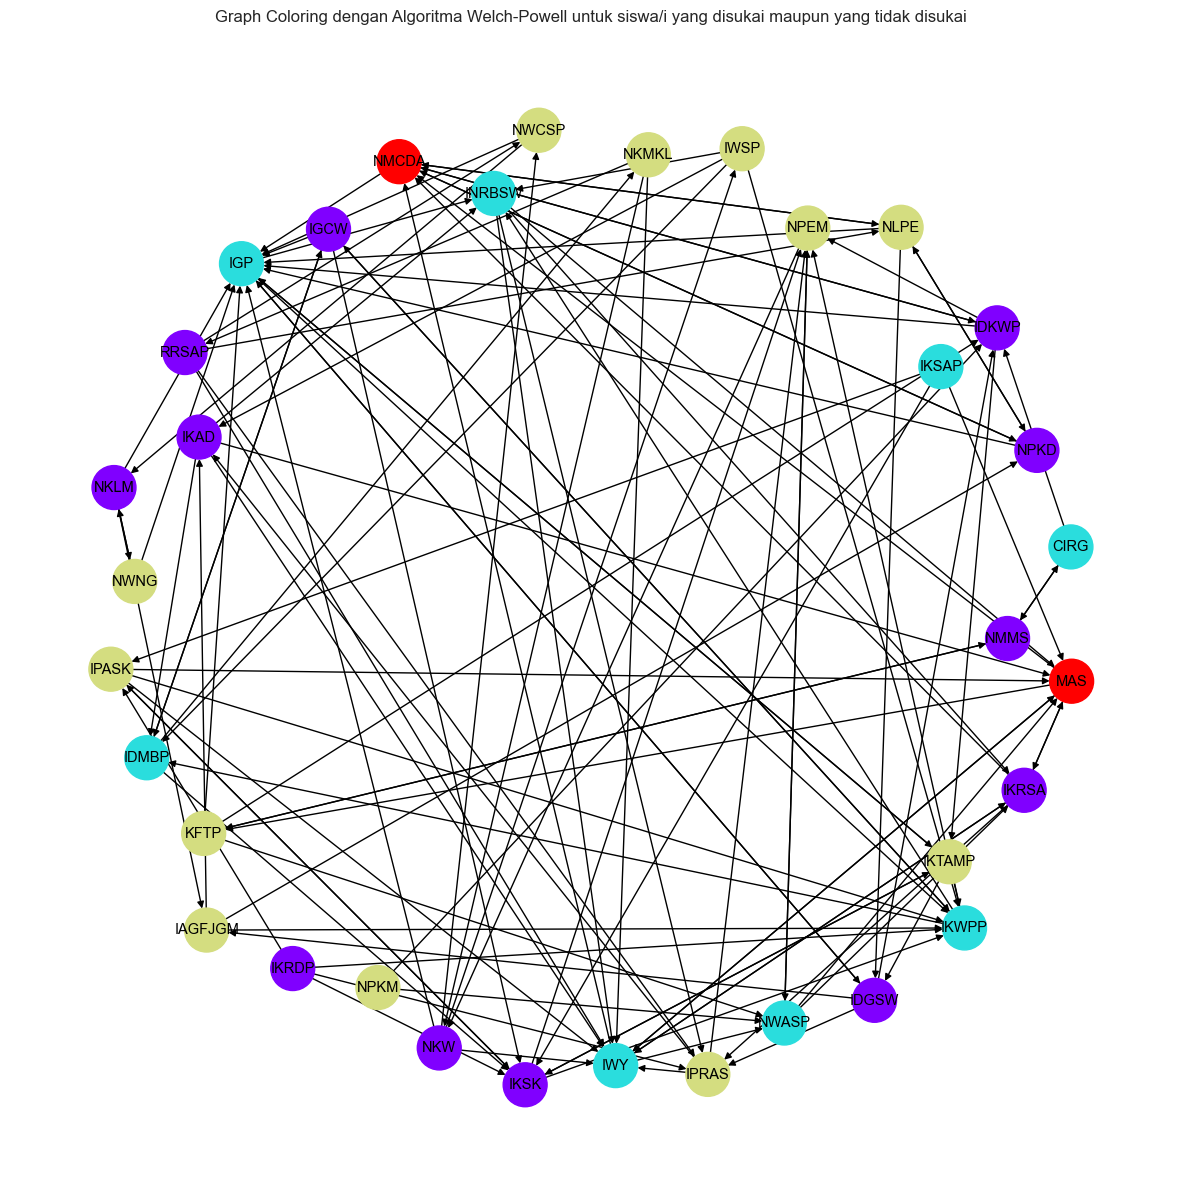

CPU times: user 1.63 s, sys: 519 ms, total: 2.15 s
Wall time: 1.53 s


In [45]:
%%time
cmap = plt.cm.rainbow
norm = plt.Normalize(0, num_colors-1)

normalized_colors = [cmap(norm(color)) for color in colors]
degree_dict = dict(G.degree())
nx.set_node_attributes(G, degree_dict, 'count')

fig, ax = plt.subplots(figsize=(15, 15))
nx.draw(G, pos, with_labels=True, node_color=colors, cmap=cmap, font_size=10.5, ax=ax, node_size=1000)
ax.set_title('Graph Coloring dengan Algoritma Welch-Powell untuk siswa/i yang disukai maupun yang tidak disukai')

# Membuat legenda berdasarkan pewarnaan yang unik dan mapping warnanya
custom_labels = ["Disukai A", "Disukai B", "Tidak A", "Tidak B"]
legend_labels = {color: f'Cluster {color+1}' for color in set(colors)}
# handles = [Patch(color=cmap(norm(color)), label=label) for color, label in legend_labels.items()]

# Membuat legenda berdasarkan pewarnaan yang unik
unique_colors = list(set(colors))
handles = [Patch(color=cmap(norm(color)), label=custom_labels[color]) for color in unique_colors]

# ax.legend(handles=handles, title='Clusters')
plt.show()


In [46]:
file_path = "./sociometryclustering/Processed Data A.csv"
df = pd.read_csv(file_path)
df

,version https://git-lfs.github.com/spec/v1
0,oid sha256:a4d9f75dc432c204cb98421670b8336f984...
1,size 11167


In [47]:
# Gabungkan kolom teman yang disukai dan tidak disukai menjadi satu DataFrame baru
df_teman_sukai = pd.concat([df['1. Teman anda yang paling anda sukai di kelas'], df['2. Teman anda yang paling anda sukai di kelas']],ignore_index=True).dropna()

df_teman_tidak_sukai = pd.concat([df['1. Teman anda yang paling anda tidak sukai di kelas'], df['2. Teman anda yang paling anda tidak sukai di kelas']],ignore_index=True).dropna()

# Bersihkan dan normalisasi data
df_teman_y = df_teman_sukai.str.strip()
df_teman_x = df_teman_tidak_sukai.str.strip()

# Ganti NaN dengan string kosong ('') sebelum menghitung frekuensi
df_teman_y = df_teman_y.fillna('')
df_teman_x = df_teman_x.fillna('')

# Hitung frekuensi kemunculan teman yang disukai dan tidak disukai
frekuensi_disukai = df_teman_y.value_counts().astype(float)
frekuensi_tidak_disukai = df_teman_x.value_counts().astype(float)

# Buat DataFrame kesimpulan
df_kesimpulan = pd.merge(pd.DataFrame({'Nama siswa/i yang disukai': frekuensi_disukai.index,
                                       'Frekuensi disukai': frekuensi_disukai.values}),
                         pd.DataFrame({'Nama siswa/i yang tidak disukai': frekuensi_tidak_disukai.index,
                                       'Frekuensi tidak disukai': frekuensi_tidak_disukai.values}),
                         how='outer',
                         left_index=True,
                         right_index=True)

# Tampilkan DataFrame kesimpulan
df_kesimpulan

KeyError: '1. Teman anda yang paling anda sukai di kelas'

In [192]:
# Buat data frame dengan kolom pertama
df_teman_tertuduh = pd.DataFrame({'Nama yang sering disebutkan': df_teman_tidak_sukai})

# Gabungkan data frame dengan kolom kedua dari df
df_teman_tertuduh['Nama orang yang menyebutkan'] = df['NAMA LENGKAP']

# Hitung frekuensi kemunculan nama yang sering disebutkan
frekuensi_nama = df_teman_tertuduh['Nama yang sering disebutkan'].value_counts()

# Buat fungsi untuk mengisi nilai NaN dengan nama yang sesuai atau string kosong jika tidak ada yang sesuai
def fill_name(row):
    nama_sering_disebutkan = row['Nama yang sering disebutkan']
    matching_names = df_teman_tertuduh[df_teman_tertuduh['Nama yang sering disebutkan'].str.contains(nama_sering_disebutkan)]['Nama orang yang menyebutkan'].apply(str).values
    matching_names = [name for name in matching_names if not pd.isna(name)]
    if len(matching_names) > 0:
        return ', '.join(matching_names)
    else:
        return ''

# Terapkan fungsi ke kolom "Nama orang yang menyebutkan"
df_teman_tertuduh['Nama orang yang menyebutkan'] = df_teman_tertuduh.apply(fill_name, axis=1)

# Hapus duplikat
df_teman_tertuduh.drop_duplicates(inplace=True)

# Hapus nilai NaN
df_teman_tertuduh.dropna(subset=['Nama orang yang menyebutkan'], inplace=True)

# Mengatur kolom 'Nama yang sering disebutkan' sebagai index
df_teman_tertuduh.set_index('Nama yang sering disebutkan', inplace=True)

# Sekarang df_teman_tertuduh akan berisi dua kolom seperti yang Anda inginkan, dengan NaN diisi dengan nilai yang sesuai atau string kosong
df_teman_tertuduh

,Nama orang yang menyebutkan
Nama yang sering disebutkan,
I Dewa Ketut Widhisandhyka Premana,"Cokorda Istri Ratu Giriningrum, Komang Floresi..."
I Putu Reva Adi Saputra,"I Dewa Gede Satria Wibawa, nan, nan, nan"
Ni Putu Eca Masyuni,"I Dewa Ketut Widhisandhyka Premana, I Kadek Su..."
I Kadek Suartana Kencana,"I Dewa Made Baskara Putradana, I Kadek Rehan D..."
I Komang Wahyu Premana Putra,"I Gede Candra Winata, I Wayan Siva Pradiyoga, ..."
I Nyoman Rio Budi Saputra Wijaya,"I Gede Pratama, I Kadek Agus Dwiananda, nan, nan"
Ni Made Cempaka Dwi Arsikasari,"I Kadek Rio Sukma Adi, Made Anasuya Sw, nan, nan"
I Putu Adrian Satya Kusuma,I Komang Satya Adi Perdana
I Kadek Rio Sukma Adi,"I Nyoman Rio Budi Saputra Wijaya, Ni Wayan Ari..."
